## **Import libraries**:

In [65]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [66]:
%cd drive/MyDrive/Colab\ Notebooks/data

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/data'
/content/drive/MyDrive/Colab Notebooks/data


## **Preprocess data**

In [67]:
df = pd.read_csv('adverse_summary.csv')
df.head()

,ItemID,Text,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity
0,8597014,trial of labor after cesarean delivery (tolac)...,NaN,NaN,"title, abstract, abstract, abstract, abstract,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4649030,visual symptoms are well recognized as a side...,NaN,NaN,NaN,NaN,NaN,"introduction,",NaN,NaN,NaN,NaN,NaN,NaN
2,5174074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7985785,there have also been numerous reports on the ...,NaN,NaN,"background, background, background, methods, r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4837660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
def remove_duplicate(x):
  if pd.isna(x):
    return x
  return ', '.join(set(filter(None, x.split(', '))))

In [69]:
df_new = df.iloc[:,2:].applymap(remove_duplicate)

In [70]:
df_new.insert(0, 'Text', df['Text'])
df_new.insert(0, 'ItemID', df['ItemID'])
df_new.head()

,ItemID,Text,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity
0,8597014,trial of labor after cesarean delivery (tolac)...,NaN,NaN,"abstract, results, discussion, introduction, m...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4649030,visual symptoms are well recognized as a side...,NaN,NaN,NaN,NaN,NaN,introduction,NaN,NaN,NaN,NaN,NaN,NaN
2,5174074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7985785,there have also been numerous reports on the ...,NaN,NaN,"methods, conclusions, background, results",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4837660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_new['Text'] = df_new['Text'].apply(lambda x: x if pd.isna(x) else '.'.join([i.strip().capitalize() for i in x.split('.')]))
df_new.head()

,ItemID,Text,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity
0,8597014,Trial of labor after cesarean delivery (tolac)...,NaN,NaN,"abstract, results, discussion, introduction, m...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4649030,Visual symptoms are well recognized as a side ...,NaN,NaN,NaN,NaN,NaN,introduction,NaN,NaN,NaN,NaN,NaN,NaN
2,5174074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7985785,There have also been numerous reports on the p...,NaN,NaN,"methods, conclusions, background, results",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4837660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Significant section titles**:

In [127]:
# df_new.to_csv('adverse_summary_mod.csv')
df_new = pd.read_csv('adverse_summary_mod.csv')

In [128]:
def gen_list(k):
  return pd.Series(filter(None, sum([[] if pd.isna(x) else x.split(', ') for x in df_new[k]], []) ))

In [129]:
def plot_hist(k):
  gl = gen_list(k).value_counts().head(20)
  print(gl)
  gl.plot(kind='bar')
  plt.axhline(gl.mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
  plt.title(k)
  plt.show()
  return

### **chemically_induced**

p333_electrochemically_induced_change_in_the_morphology_of_red_blood_cells_–_a_new_method_for_the_diagnosis_of_critical_conditions    2
discussion                                                                                                                            1
search_strategy                                                                                                                       1
methods                                                                                                                               1
dtype: int64


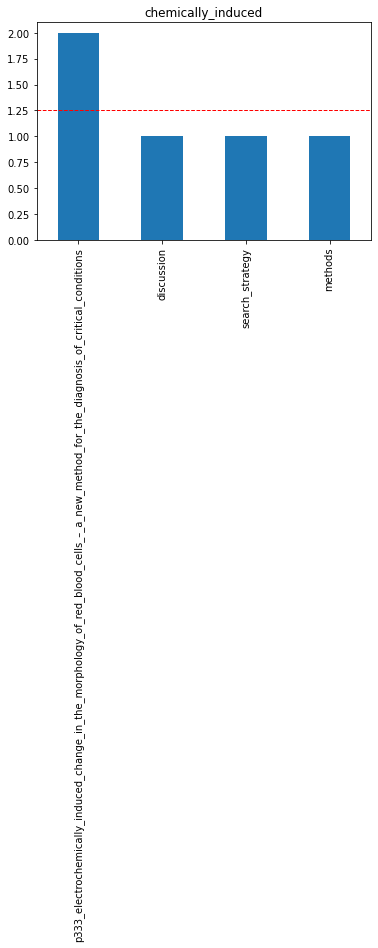

In [130]:
plot_hist('chemically_induced')

### **adverse_effect**

discussion                                550
abstract                                  275
introduction                              231
results                                   200
background                                159
methods                                    76
case_presentation                          71
discussion_and_conclusions                 69
conclusion                                 65
conclusions                                46
materials_and_methods                      27
case_report                                26
about_this_article                         26
patients_and_methods                       24
discussion_and_conclusion                  22
oral_presentations                         17
title                                      16
poster_presentations_–_tuesday_2_april     14
poster_presentations_–_monday_1_april      14
posters                                    10
dtype: int64


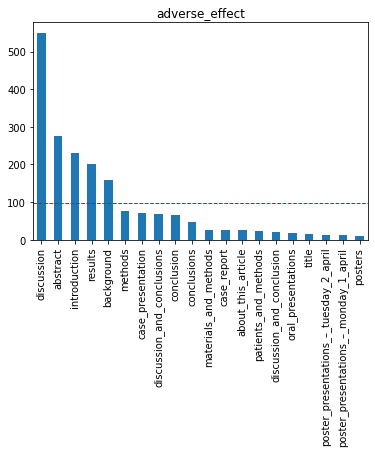

In [131]:
plot_hist('adverse_effect')

### **complication**

discussion                    1282
abstract                       843
results                        596
introduction                   596
background                     448
case_presentation              234
conclusion                     197
discussion_and_conclusions     197
methods                        194
conclusions                    193
about_this_article              84
materials_and_methods           84
case_report                     82
title                           75
patients_and_methods            61
discussion_and_conclusion       49
literatur                       27
case_2                          20
case_1                          17
oral_presentations              17
dtype: int64


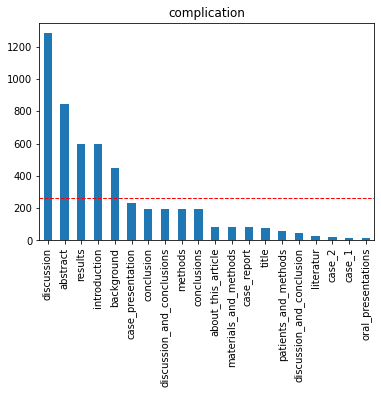

In [132]:
plot_hist('complication')

### **poisoning**

discussion                                                            64
abstract                                                              39
introduction                                                          32
about_this_article                                                    28
results                                                               28
background                                                            22
title                                                                 20
conclusion                                                            19
methods                                                               13
e-posters                                                              9
case_presentation                                                      8
conclusions                                                            6
case_report                                                            6
literatur                                          

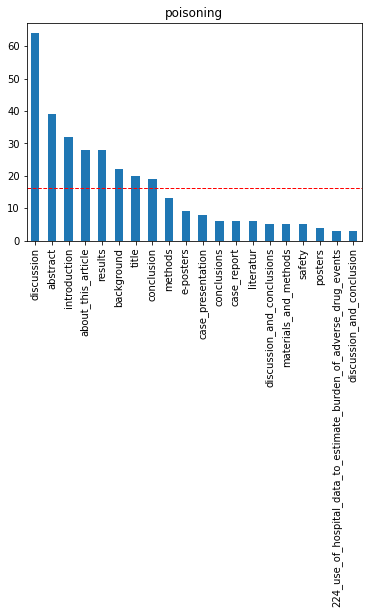

In [133]:
plot_hist('poisoning')

### **drug_effect**

discussion                                                                                          19
abstract                                                                                            11
posters                                                                                              8
background                                                                                           6
discussion_and_conclusions                                                                           5
results                                                                                              5
methods                                                                                              5
introduction                                                                                         4
case_presentation                                                                                    3
isop18-1254_adverse_drug_reaction_reports_following_a_“brand_switch”._the

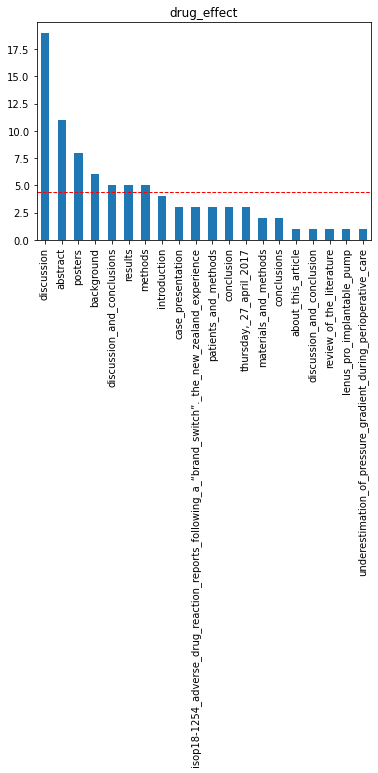

In [134]:
plot_hist('drug_effect')

### **side_effect**

discussion                                1002
abstract                                   527
introduction                               412
results                                    382
background                                 277
case_presentation                          174
methods                                    150
conclusions                                116
discussion_and_conclusions                 108
conclusion                                 101
materials_and_methods                       55
about_this_article                          54
case_report                                 47
title                                       39
patients_and_methods                        37
discussion_and_conclusion                   30
oral_presentations                          17
poster_presentations_–_tuesday_2_april      14
poster_presentations_–_monday_1_april       14
case_1                                      13
dtype: int64


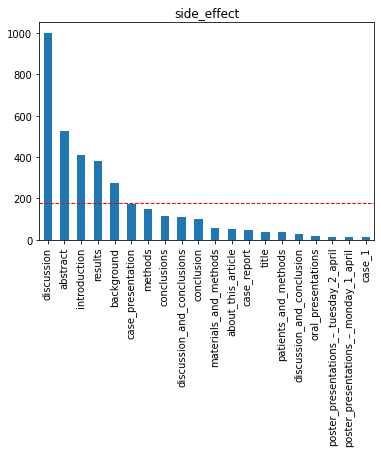

In [135]:
plot_hist('side_effect')

### **adverse_reaction**

discussion                                                                                                           163
abstract                                                                                                             101
results                                                                                                               95
introduction                                                                                                          65
background                                                                                                            47
methods                                                                                                               45
discussion_and_conclusions                                                                                            29
case_presentation                                                                                                     24
conclusions                     

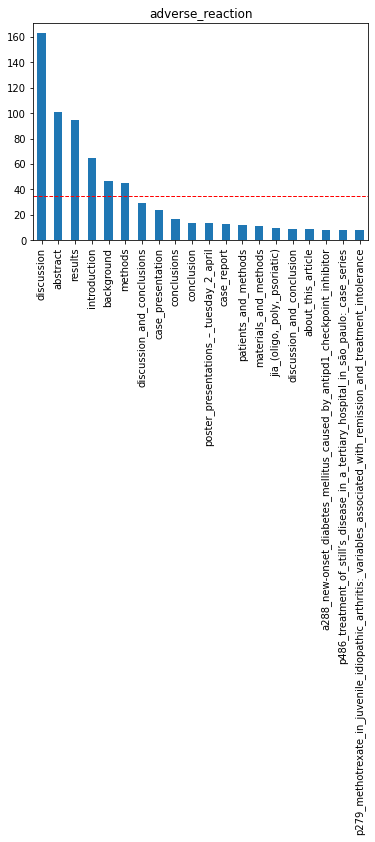

In [136]:
plot_hist('adverse_reaction')

### **pharmacological_action**

discussion                       9
281_drug-induced_liver_injury    3
discussion_and_conclusions       3
introduction                     3
ehf_invited_speakers             2
abstract                         1
background                       1
methods                          1
dtype: int64


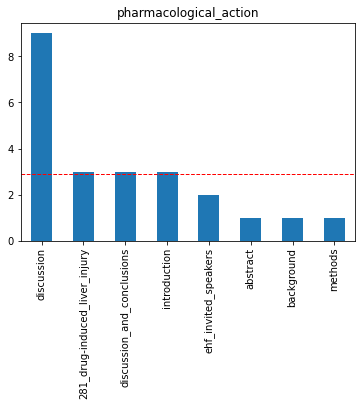

In [137]:
plot_hist('pharmacological_action')

### **adverse_drug_event**

discussion                                                                                                                                                           15
introduction                                                                                                                                                         12
treatment_i                                                                                                                                                          10
posters                                                                                                                                                               8
abstract                                                                                                                                                              7
background                                                                                                                                                      

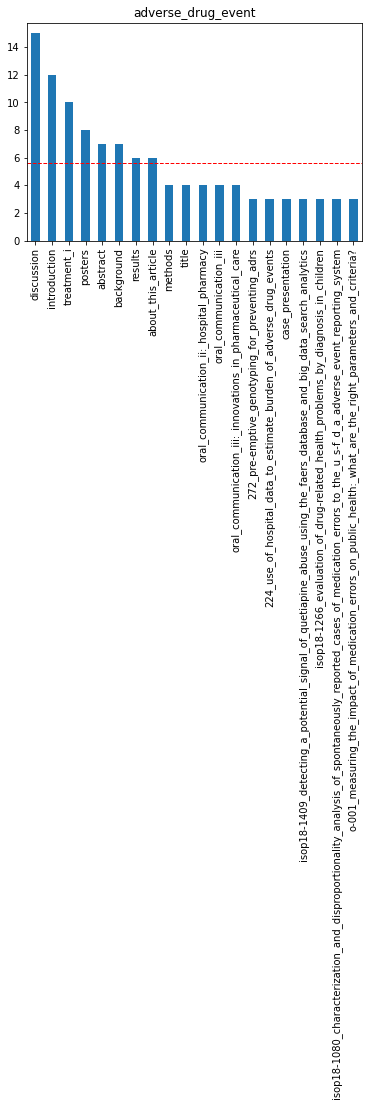

In [138]:
plot_hist('adverse_drug_event')

### **adverse_event**

results                       999
discussion                    989
abstract                      899
methods                       528
introduction                  395
background                    253
patients_and_methods          230
materials_and_methods         221
case_presentation             119
conclusions                    98
safety                         98
discussion_and_conclusions     90
about_this_article             77
case_report                    72
conclusion                     63
title                          59
adverse_events                 51
abbreviations                  43
study_design                   35
toxicity                       35
dtype: int64


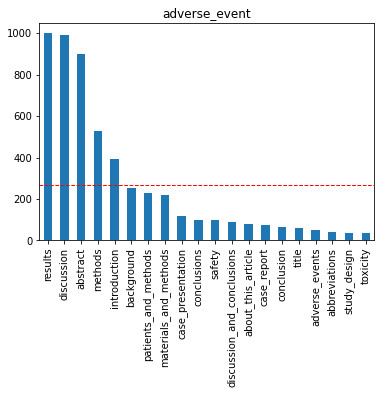

In [139]:
plot_hist('adverse_event')

### **adverse**

discussion                    1690
abstract                      1372
results                       1244
introduction                   754
methods                        648
background                     485
patients_and_methods           251
materials_and_methods          240
case_presentation              230
conclusions                    176
discussion_and_conclusions     175
conclusion                     166
about_this_article             150
case_report                    114
title                          113
safety                         107
adverse_events                  54
discussion_and_conclusion       49
abbreviations                   46
summary                         43
dtype: int64


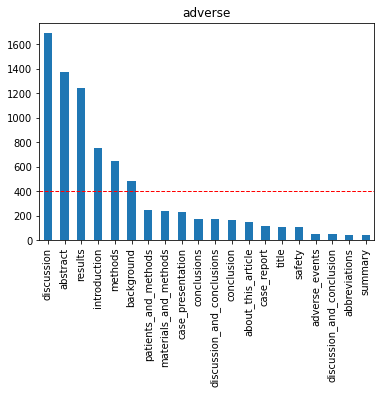

In [140]:
plot_hist('adverse')

### **complexity**

discussion                                                                                                                                     51
introduction                                                                                                                                   17
abstract                                                                                                                                       17
background                                                                                                                                     16
poster_presentations_–_monday_1_april                                                                                                          14
treatment_i                                                                                                                                    10
discussion_and_conclusions                                                                                                  

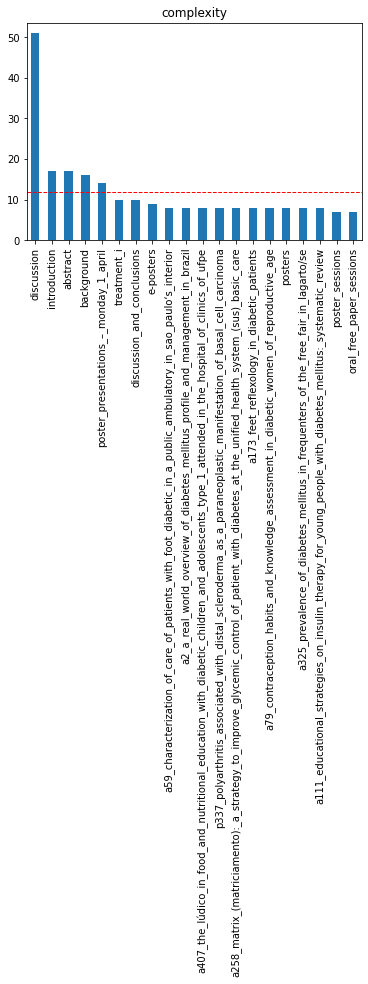

In [141]:
plot_hist('complexity')

## **Compare sections containing filters:**

In [87]:
headers = ["chemically_induced","adverse_effect","complication","poisoning","drug_effect","side_effect","adverse_reaction","pharmacological_action","adverse_drug_event","adverse_event","adverse","complexity"]

scdf = pd.DataFrame(dict((key, gen_list(key).value_counts().head(20)) for key in headers))
scdf.head()

,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity
224_use_of_hospital_data_to_estimate_burden_of_adverse_drug_events,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
272_pre-emptive_genotyping_for_preventing_adrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
281_drug-induced_liver_injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
a111_educational_strategies_on_insulin_therapy_for_young_people_with_diabetes_mellitus:_systematic_review,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
a173_feet_reflexology_in_diabetic_patients,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


Count total filters:

In [88]:
total = scdf.sum(axis=1)

Change values:

In [89]:
scdf = scdf.applymap(lambda x: 0 if pd.isna(x) else (1 if x>0 else 0))

Find sum by index:

In [90]:
scdf['weight'] = scdf.sum(axis=1)

In [91]:
scdf['total'] = total

Sort by total:

In [92]:
scdf.sort_values(by='total', ascending=False, inplace=True)

Preview data:

In [93]:
scdf['total'].head(25)

discussion                                5835.0
abstract                                  4092.0
results                                   3555.0
introduction                              2521.0
background                                1721.0
methods                                   1665.0
case_presentation                          866.0
discussion_and_conclusions                 691.0
conclusions                                654.0
materials_and_methods                      645.0
conclusion                                 628.0
patients_and_methods                       618.0
about_this_article                         435.0
case_report                                360.0
title                                      326.0
safety                                     210.0
discussion_and_conclusion                  163.0
adverse_events                             105.0
abbreviations                               89.0
oral_presentations                          51.0
summary             

In [94]:
scdf['total'].mean()

402.4375

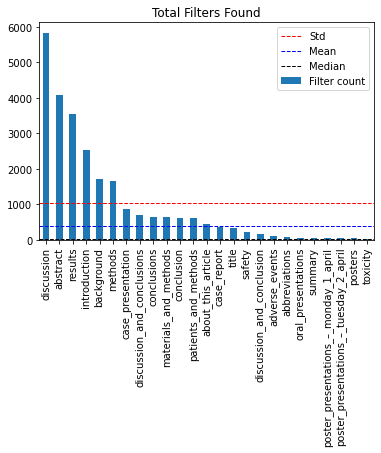

In [95]:
scdf['total'].head(25).plot(kind='bar', label='Filter count')
plt.axhline(scdf['total'].std(), color='r', linestyle='dashed', linewidth=1, label='Std')
plt.axhline(scdf['total'].mean(), color='b', linestyle='dashed', linewidth=1, label='Mean')
plt.axhline(scdf['total'].median(), color='k', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.title('Total Filters Found')
plt.show()

In [96]:
scdf.sort_values(by='weight', ascending=False)['weight'].head(20)

discussion                                12
introduction                              11
background                                11
methods                                   11
abstract                                  11
discussion_and_conclusions                10
results                                    9
case_presentation                          9
about_this_article                         9
conclusion                                 8
materials_and_methods                      8
conclusions                                8
patients_and_methods                       7
case_report                                7
title                                      7
discussion_and_conclusion                  7
posters                                    5
oral_presentations                         3
poster_presentations_–_monday_1_april      3
poster_presentations_–_tuesday_2_april     3
Name: weight, dtype: int64

In [97]:
scdf['weight'].mean()

3.3125

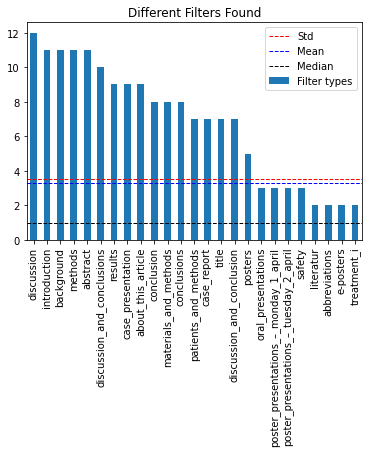

In [98]:
scdf.sort_values(by='weight', ascending=False)['weight'].head(25).plot(kind='bar', label='Filter types')
plt.axhline(scdf['weight'].std(), color='r', linestyle='dashed', linewidth=1, label='Std')
plt.axhline(scdf['weight'].mean(), color='b', linestyle='dashed', linewidth=1, label='Mean')
plt.axhline(scdf['weight'].median(), color='k', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.title('Different Filters Found')
plt.show()

In [99]:
scdf.head(30)

,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity,weight,total
discussion,1,1,1,1,1,1,1,1,1,1,1,1,12,5835.0
abstract,0,1,1,1,1,1,1,1,1,1,1,1,11,4092.0
results,0,1,1,1,1,1,1,0,1,1,1,0,9,3555.0
introduction,0,1,1,1,1,1,1,1,1,1,1,1,11,2521.0
background,0,1,1,1,1,1,1,1,1,1,1,1,11,1721.0
methods,1,1,1,1,1,1,1,1,1,1,1,0,11,1665.0
case_presentation,0,1,1,1,1,1,1,0,1,1,1,0,9,866.0
discussion_and_conclusions,0,1,1,1,1,1,1,1,0,1,1,1,10,691.0
conclusions,0,1,1,1,1,1,1,0,0,1,1,0,8,654.0
materials_and_methods,0,1,1,1,1,1,1,0,0,1,1,0,8,645.0


## **Sentiment Analysis (VADER):**

In [100]:
df_new['Text']

0       Trial of labor after cesarean delivery (tolac)...
1       Visual symptoms are well recognized as a side ...
2                                                     NaN
3       There have also been numerous reports on the p...
4                                                     NaN
                              ...                        
6820    After 3 months of treatment, anthropometric as...
6821                                                  NaN
6822    1007/s10072-018-3471-6 keywords ipilimumab mya...
6823    In five patients (#1, 2, 4, 6, 7) the antibiot...
6824                                                  NaN
Name: Text, Length: 6825, dtype: object

In [101]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [102]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [103]:
def sentiment(text):
  if pd.isna(text):
    return "no_filter"
  
  score = SentimentIntensityAnalyzer().polarity_scores(text)
  if score['neg'] > score['pos']:
      return "adverse_effect"
  elif score['neg'] < score['pos']:
      return "no_adverse_effect"
  
  return "neutral"

In [104]:
sentiment_score = df_new['Text'].apply(sentiment)
sentiment_score

0          adverse_effect
1          adverse_effect
2               no_filter
3          adverse_effect
4               no_filter
              ...        
6820       adverse_effect
6821            no_filter
6822    no_adverse_effect
6823       adverse_effect
6824            no_filter
Name: Text, Length: 6825, dtype: object

In [105]:
df_new['sentiment_score'] = sentiment_score

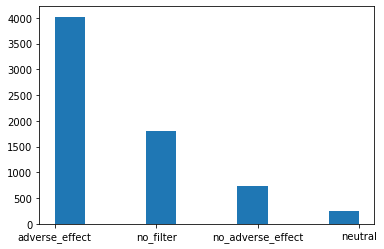

In [106]:
plt.hist(df_new['sentiment_score'])
plt.show()

In [107]:
df_new['sentiment_score'].value_counts()

adverse_effect       4023
no_filter            1806
no_adverse_effect     743
neutral               253
Name: sentiment_score, dtype: int64

## **Timing**:

In [108]:
df_new['Text'][0]

'Trial of labor after cesarean delivery (tolac) in japan: rates and complications.To determine the rates of trial of labor after cesarean delivery (tolac) and complications in japan.Rates of tolac were investigated by facility type, and we calculated the rates of maternal and perinatal complications including uterine rupture in tolac.With regard to complications, we identified eight cases (0.Conclusion the tolac rate in japan was considerably lower than that reported in other countries, despite comparable complication rates.On the other hand, concern is widespread about complications in tolac, including uterine rupture [ 10 ].National institutes of health (nih) has conducted a systematic review of these complications, and indicated that tolac is a reasonable option for many women and has encouraged medical institutions to facilitate access to tolac [ 9 , 11 ].Japanese rates of tolac and associated complications remain unclear.Many studies from the united states and elsewhere have focus